<a href="https://colab.research.google.com/github/chinicapster/MindXDA/blob/main/Final_Test_Mai_Le_Quynh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
link = 'https://drive.google.com/file/d/14FCq1IBXWxXmBGcDcYJzAxrcPC0pr6Ox/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

## ABOUT DATASET

In [ ]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,886,...,130,mpfi,347,268,9,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,886,...,130,mpfi,347,268,9,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,945,...,152,mpfi,268,347,9,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,998,...,109,mpfi,319,34,10,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,994,...,136,mpfi,319,34,8,115,5500,18,22,17450
5,6,2,audi fox,gas,std,two,sedan,fwd,front,998,...,136,mpfi,319,34,85,110,5500,19,25,15250
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,1058,...,136,mpfi,319,34,85,110,5500,19,25,17710
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,1058,...,136,mpfi,319,34,85,110,5500,19,25,18920
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,1058,...,131,mpfi,313,34,83,140,5500,17,20,23875
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,995,...,131,mpfi,313,34,7,160,5500,16,22,17859167


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_ID            205 non-null    int64 
 1   symboling         205 non-null    int64 
 2   CarName           205 non-null    object
 3   fueltype          205 non-null    object
 4   aspiration        205 non-null    object
 5   doornumber        205 non-null    object
 6   carbody           205 non-null    object
 7   drivewheel        205 non-null    object
 8   enginelocation    205 non-null    object
 9   wheelbase         205 non-null    int64 
 10  carlength         205 non-null    int64 
 11  carwidth          205 non-null    int64 
 12  carheight         205 non-null    int64 
 13  curbweight        205 non-null    int64 
 14  enginetype        205 non-null    object
 15  cylindernumber    205 non-null    object
 16  enginesize        205 non-null    int64 
 17  fuelsystem      

In [ ]:
df.isnull().sum() # dataset không có dữ liệu null

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.describe() #cột price có vấn đề

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,103.000000,0.834146,923.687805,1597.502439,616.185366,491.195122,2555.565854,126.907317,316.863415,329.492683,74.565854,104.117073,5125.121951,25.219512,30.751220,1.024690e+05
std,59.322565,1.245307,229.283389,471.805207,156.566608,146.569969,520.680204,41.642693,68.658153,429.105243,99.368850,39.544167,476.985643,6.542142,6.886443,1.246484e+06
min,1.000000,-2.000000,93.000000,150.000000,64.000000,51.000000,1488.000000,61.000000,35.000000,28.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5.118000e+03
25%,52.000000,0.000000,945.000000,1624.000000,638.000000,508.000000,2145.000000,97.000000,305.000000,268.000000,9.000000,70.000000,4800.000000,19.000000,25.000000,7.788000e+03
50%,103.000000,1.000000,963.000000,1724.000000,654.000000,541.000000,2414.000000,120.000000,327.000000,319.000000,85.000000,95.000000,5200.000000,24.000000,30.000000,1.059500e+04
75%,154.000000,2.000000,1004.000000,1803.000000,665.000000,555.000000,2935.000000,141.000000,354.000000,339.000000,94.000000,116.000000,5500.000000,30.000000,34.000000,1.655800e+04
max,205.000000,3.000000,1209.000000,2081.000000,723.000000,598.000000,4066.000000,326.000000,394.000000,3255.000000,941.000000,288.000000,6600.000000,49.000000,54.000000,1.785917e+07


##PREPROCESSING

In [ ]:
df['CarName'].unique() # => từ đầu là thương hiệu xe, từ sau là dòng xe => cần tách thương hiệu xe ra vì đây là 1 yếu tố cần phân tích

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
df['CarBrand'] = df['CarName'].str.split(' ',expand=True)[0]
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# điều chỉnh lại 1 số chữ sai chính tả
df['CarBrand']=df['CarBrand'].replace({'vokswagen':'volkswagen','vw':'volkswagen','maxda':'mazda','Nissan':'nissan', 'porcshce':'porsche','toyouta':'toyota'})
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#Xem các dữ liệu Object
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
df = df.drop(columns = ['car_ID','CarName'], inplace=False)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,886,1688,641,...,mpfi,347,268,9,111,5000,21,27,13495,alfa-romero
1,3,gas,std,two,convertible,rwd,front,886,1688,641,...,mpfi,347,268,9,111,5000,21,27,16500,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,945,1712,655,...,mpfi,268,347,9,154,5000,19,26,16500,alfa-romero
3,2,gas,std,four,sedan,fwd,front,998,1766,662,...,mpfi,319,34,10,102,5500,24,30,13950,audi
4,2,gas,std,four,sedan,4wd,front,994,1766,664,...,mpfi,319,34,8,115,5500,18,22,17450,audi


In [ ]:
#tạo 2 bảng theo loại data
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df[cat_col]=df[cat_col].astype(str)
df_cat = df[cat_col]
df_num = df[num_col]

In [ ]:
df['price'].sort_values(ascending=False) #=> Dòng số 9, 44, 45 và 129 có giá cao bất thường => loại khỏi dataset

9      17859167
129      314005
44        89165
45        89165
74        45400
         ...   
76         5389
150        5348
50         5195
18         5151
138        5118
Name: price, Length: 205, dtype: int64

In [ ]:
df = df[df['price']<= 50000]

In [ ]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,922.820896,1596.174129,615.144279,497.681592,2555.666667,126.875622,316.636816,331.238806,75.009950,103.263682,5117.412935,25.179104,30.686567,13207.129353
std,1.254802,231.459236,476.170310,157.865684,137.752634,517.296727,41.546834,69.111666,432.861598,100.115882,37.389372,478.116381,6.423220,6.815150,7947.066342
min,-2.000000,93.000000,150.000000,64.000000,51.000000,1488.000000,61.000000,35.000000,28.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,943.000000,1634.000000,638.000000,508.000000,2169.000000,98.000000,305.000000,268.000000,9.000000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,963.000000,1724.000000,654.000000,541.000000,2414.000000,120.000000,327.000000,319.000000,85.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,2.000000,1004.000000,1815.000000,665.000000,555.000000,2926.000000,141.000000,354.000000,339.000000,94.000000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,1209.000000,2081.000000,717.000000,598.000000,4066.000000,326.000000,394.000000,3255.000000,941.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


##EDA

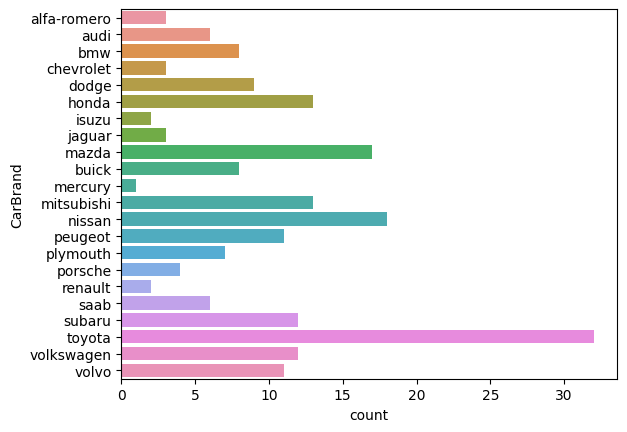

In [ ]:
# Thống kê số lượng brand
ax = sns.countplot(y = df['CarBrand'], data = df)
# => Toyota là thương hiệu phổ biến nhất, tiếp theo là Nissan, mazda, thấp nhất là mercury, renault

<Axes: >

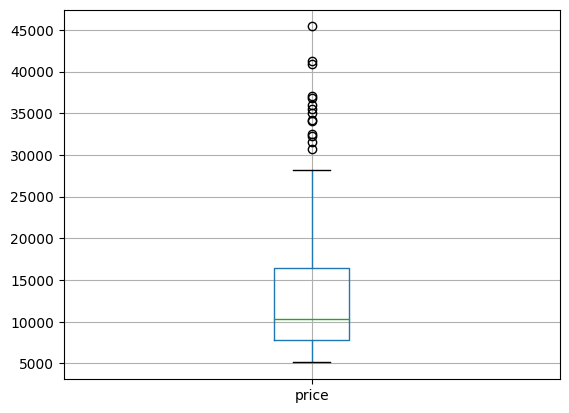

In [ ]:
import matplotlib.pyplot as plt
df.boxplot('price') => xem sự phân bố của giá

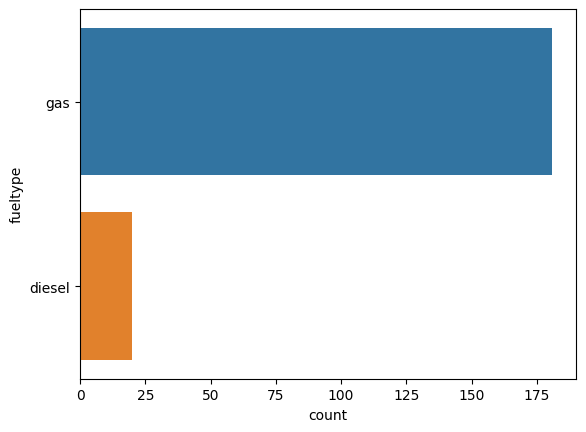

In [ ]:
ax = sns.countplot(y = df['fueltype'], data = df)
#đa số là xe chạy gas, xe chạy dầu rất ít

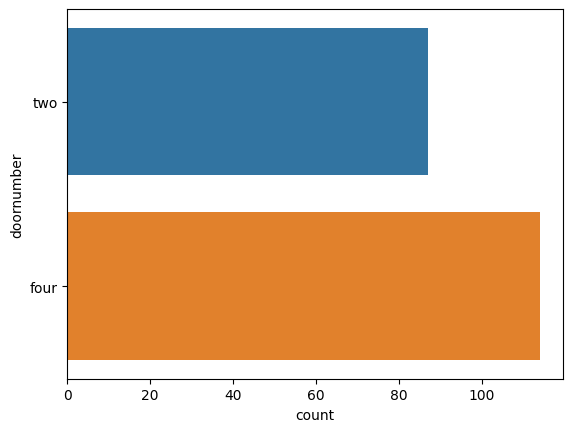

In [ ]:
ax = sns.countplot(y = df['doornumber'], data = df) #xe 4 cửa chiếm tỷ lệ cao hơn, tuy nhiên không chênh lệch nhiều

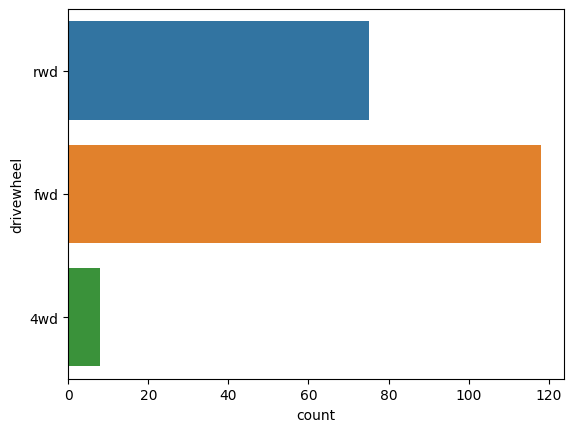

In [ ]:
ax = sns.countplot(y = df['drivewheel'], data = df)

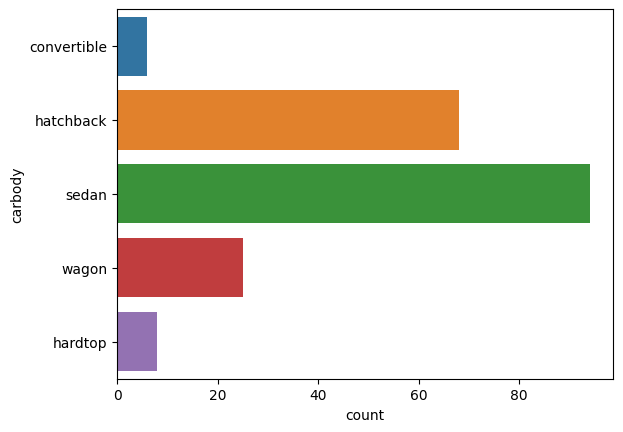

In [ ]:
ax = sns.countplot(y = df['carbody'], data = df) #dòng xe sedan là phổ biến nhất

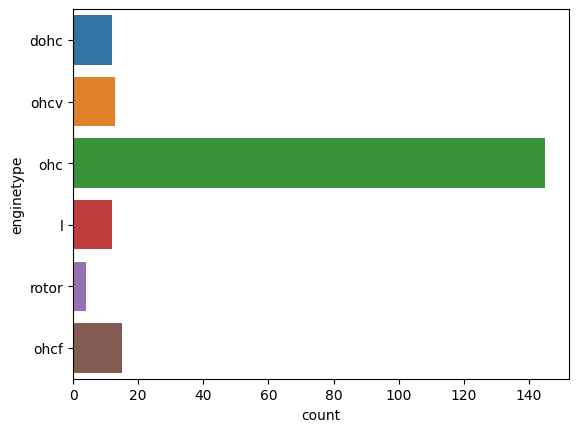

In [ ]:
ax = sns.countplot(y = df['enginetype'], data = df)

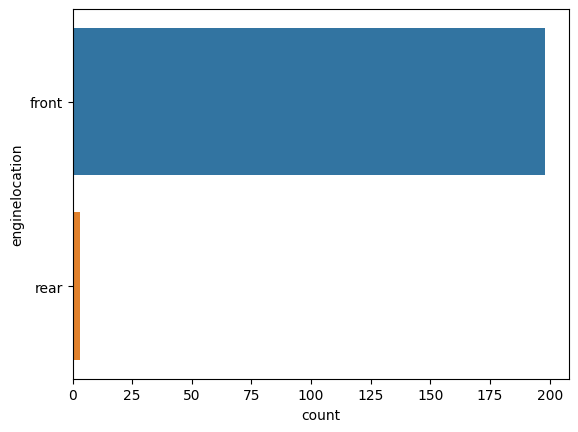

In [ ]:
ax = sns.countplot(y = df['enginelocation'], data = df)

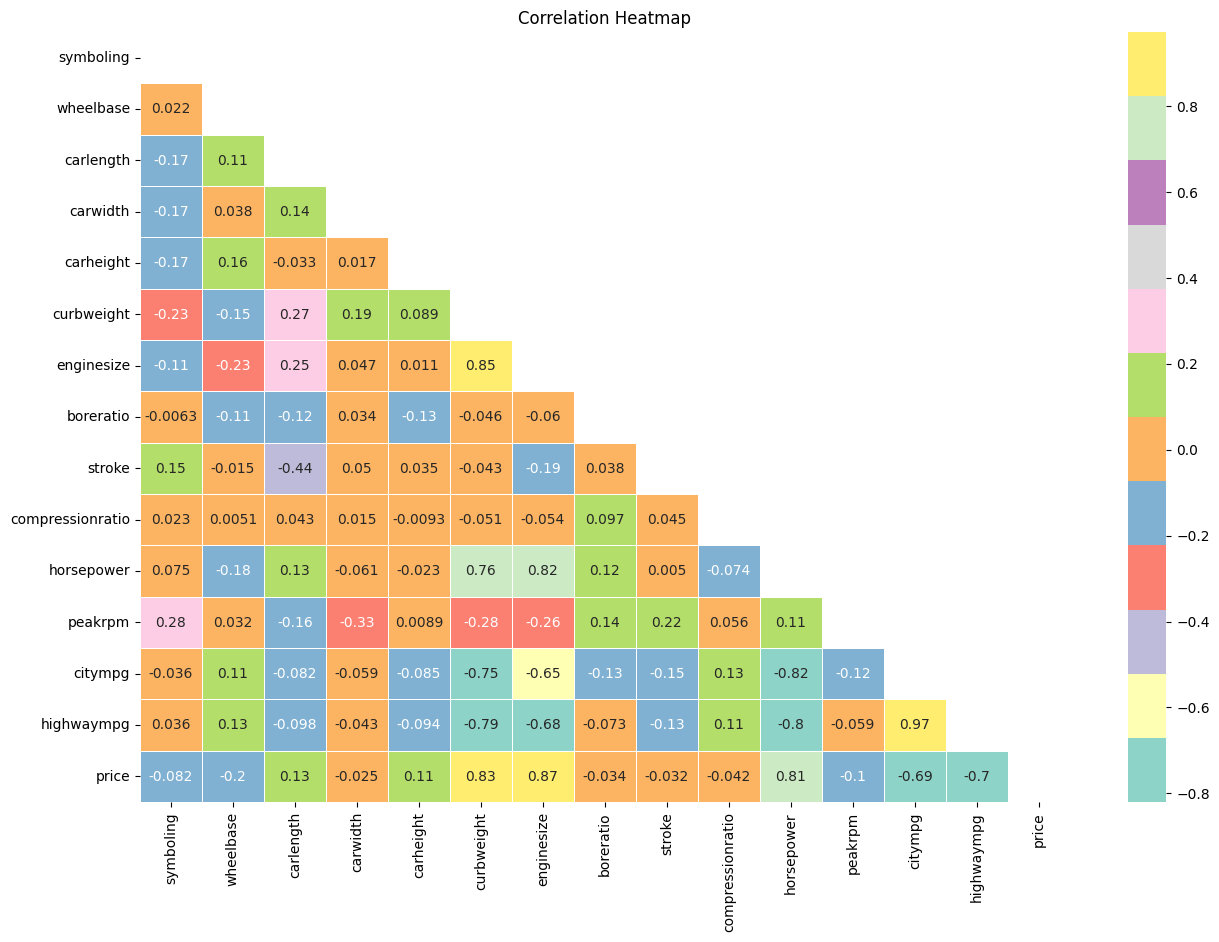

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (15,10))
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sns.heatmap(corr, mask = mask, annot = True, cmap = 'Set3', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
## => yếu tố giả cả phụ thuộc lớn nhất vào: curbweight, enginesize, horsepower, citympg, highwaympg

In [ ]:
data1=df[['curbweight','enginesize','horsepower','citympg','highwaympg']] #=> vẽ biểu đồ thể hiện mối tương quan giữa các yếu tố có ảnh hưởng lớn

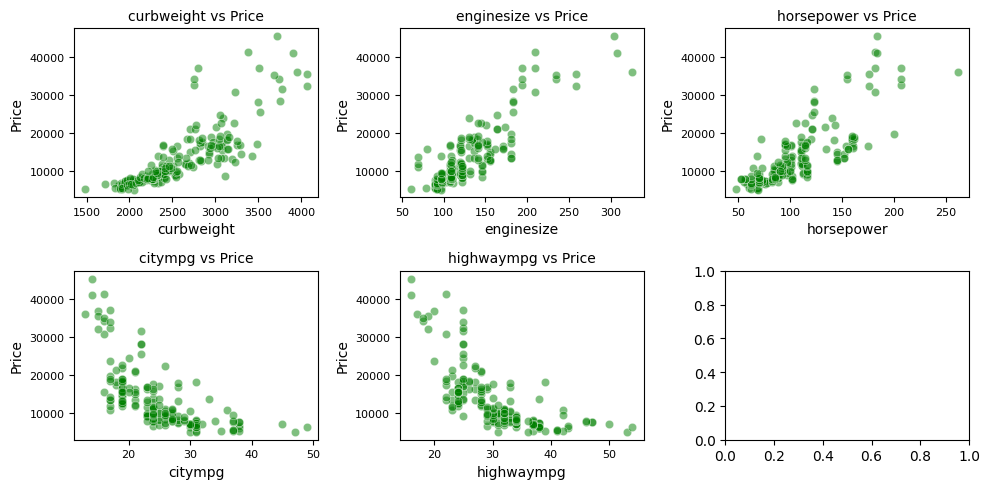

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()
for i, col in enumerate(data1):
  plot = sns.scatterplot(data = data1, x = col, y=df['price'],ax=axes[i], alpha=0.5, color="green")
  axes[i].set_title(f"{col} vs Price", fontsize=10)
  axes[i].set_xlabel(col, fontsize=10)
  axes[i].set_ylabel("Price", fontsize=10)
  axes[i].tick_params(axis="both", labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df_cat.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
df2 = df_cat.drop(columns=['CarBrand']) #encoding các cột categorical
df2 = pd.get_dummies(columns=["fueltype","enginelocation","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df2)

In [ ]:
df2.head(5)

,fueltype_diesel,fueltype_gas,enginelocation_front,enginelocation_rear,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df22 = df2.insert(0,'price', df['price'])

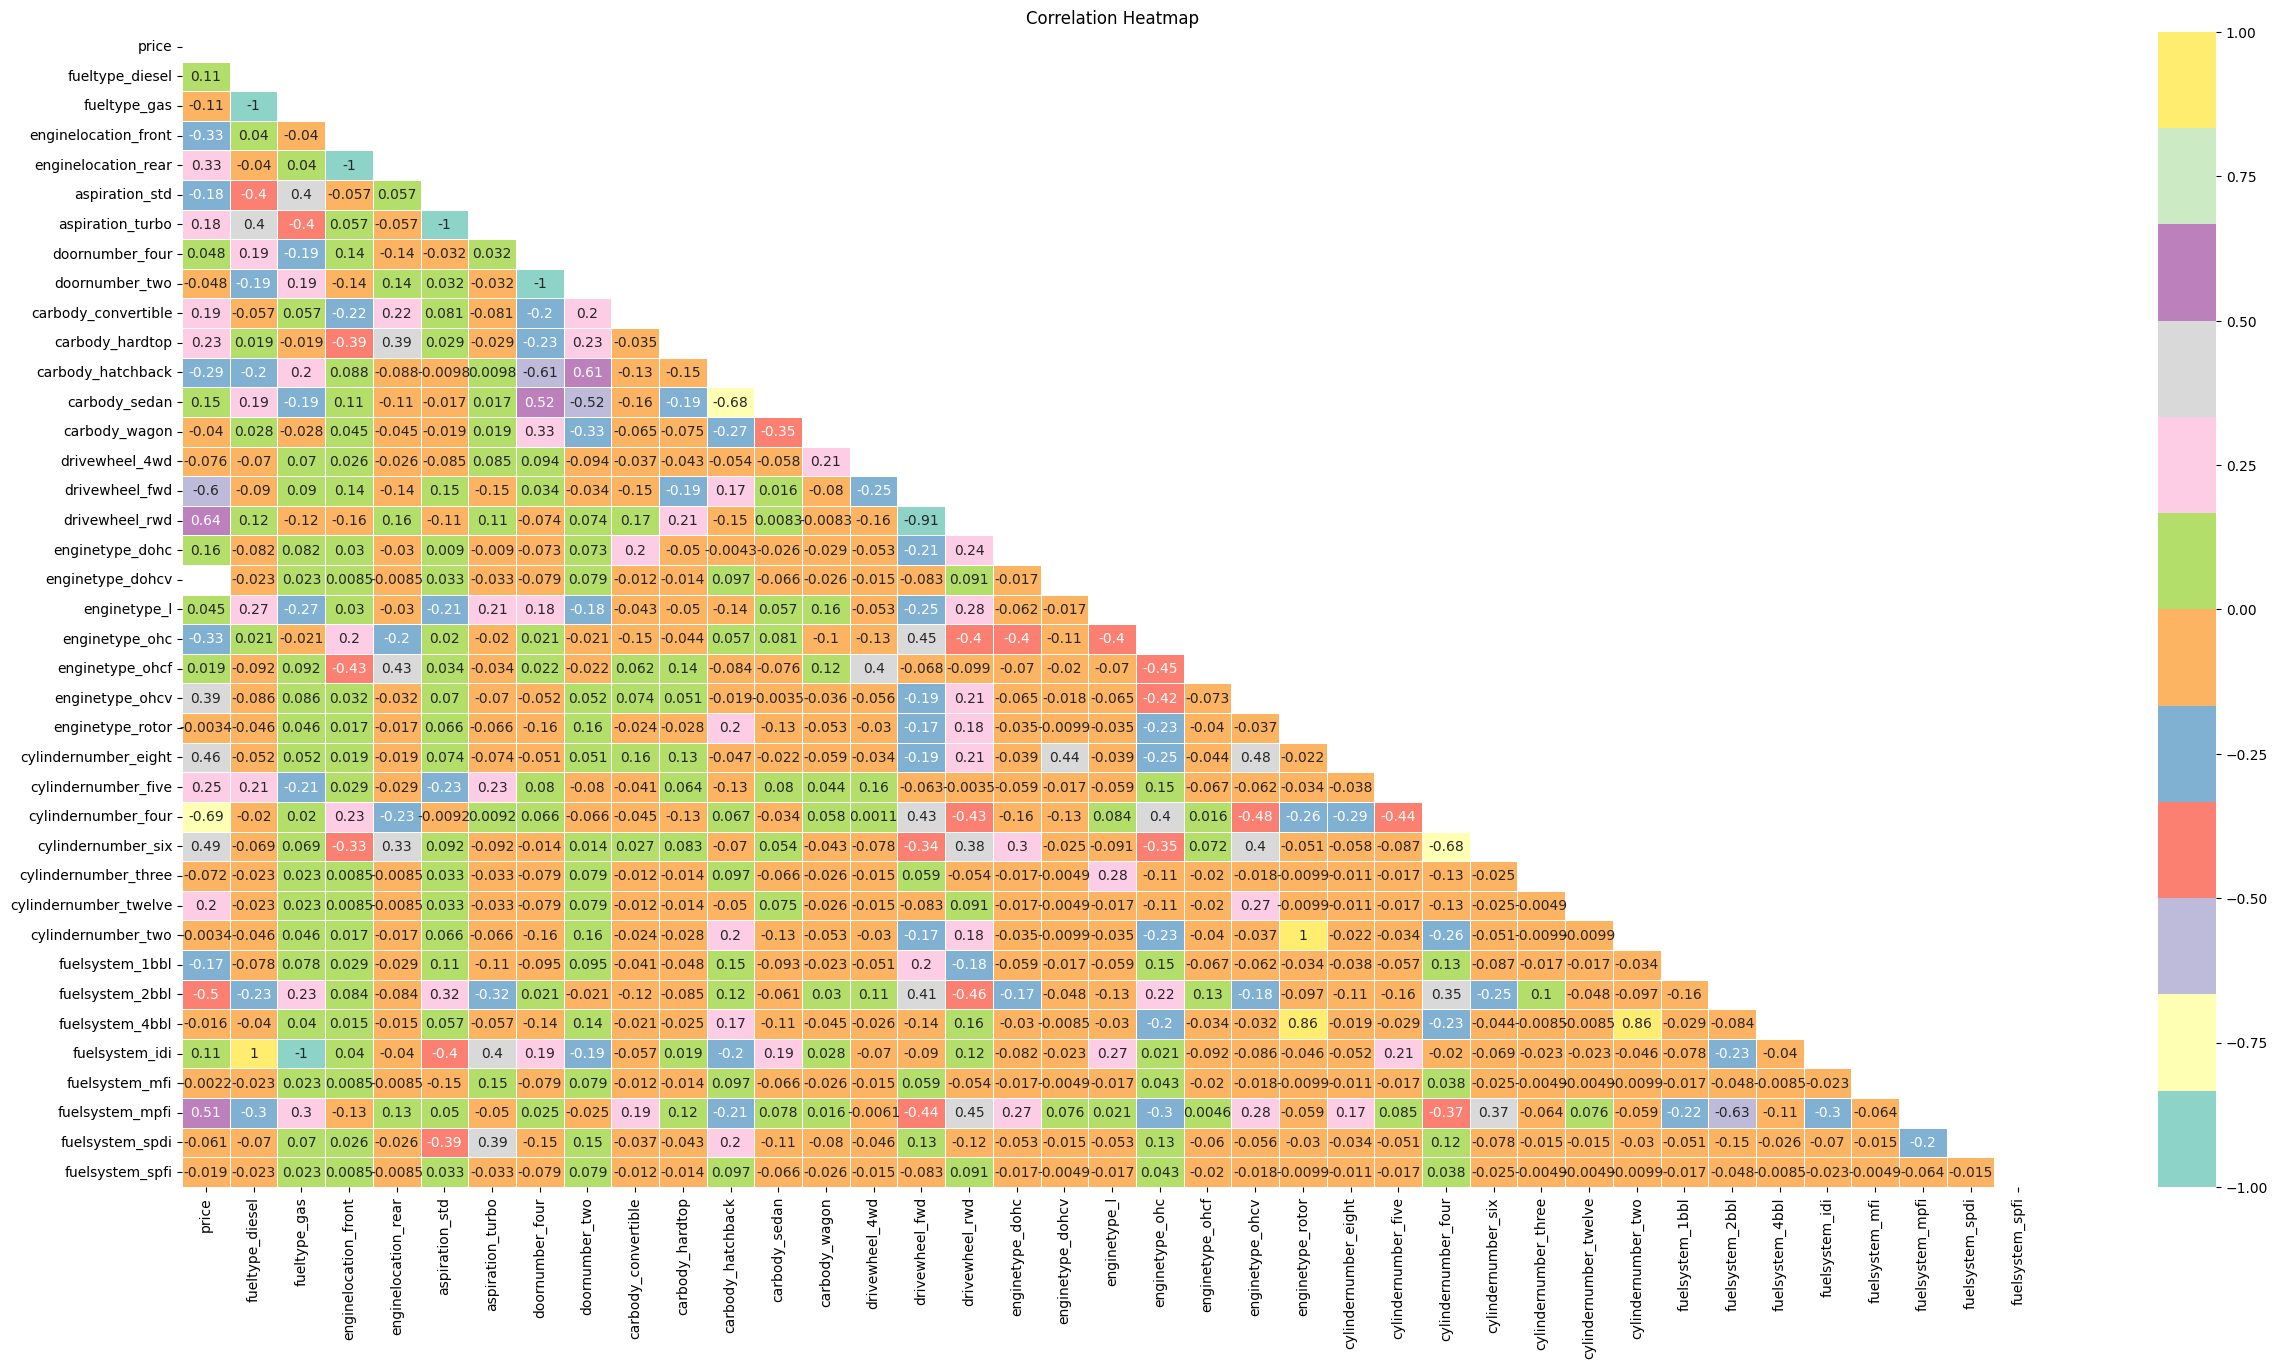

In [ ]:
# chạy biểu đồ thể hiện tương quan của các biến categorical với price
corr2 = df2.corr()
plt.figure(figsize = (30,15))
mask = np.triu(np.ones_like(df2.corr()))
sns.heatmap(corr2, mask=mask , annot = True, cmap = 'Set3', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# price phụ thuộc nhiều vào: drivewheel, cylindernumber, fuelsystem

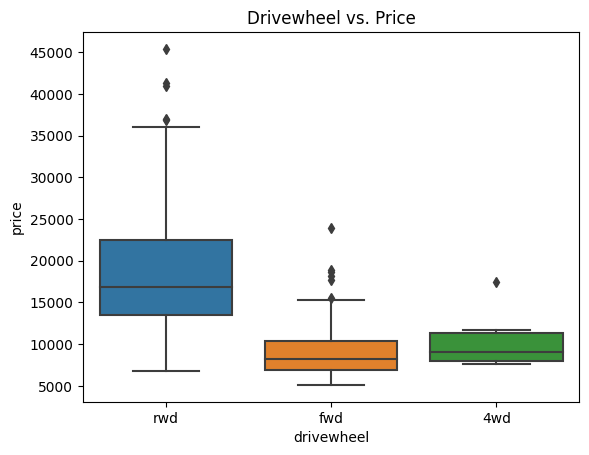

In [ ]:
sns.boxplot(data=df, x='drivewheel', y='price')
plt.title('Drivewheel vs. Price')
plt.show()

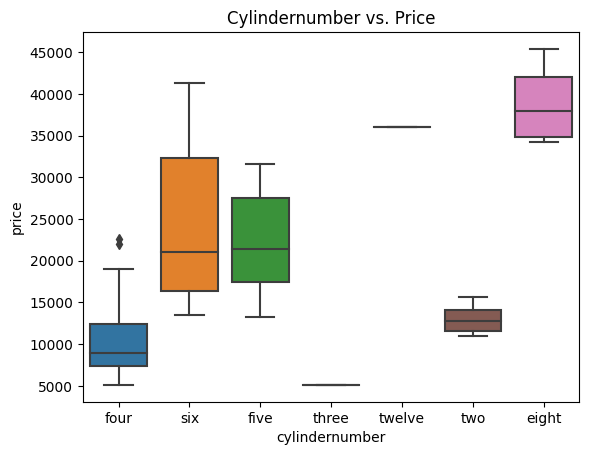

In [ ]:
sns.boxplot(data=df, x='cylindernumber', y='price')
plt.title('Cylindernumber vs. Price')
plt.show()

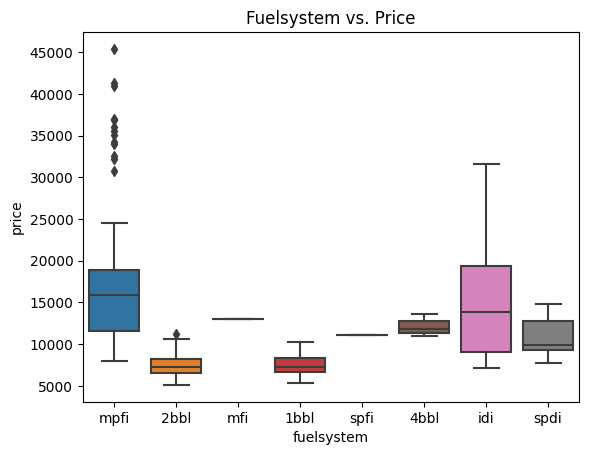

In [ ]:
sns.boxplot(data=df, x='fuelsystem', y='price')
plt.title('Fuelsystem vs. Price')
plt.show()

### MODELING

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [ ]:
data1=df[['curbweight','enginesize','horsepower','citympg','highwaympg']]

In [ ]:
X = data1
y = df['price']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
predict = model.predict(X_test)

In [ ]:
r2_square = r2_score(y_test,predict)
print(f" R-squared: {r2_square}")

 R-squared: 0.9080453787235389


In [ ]:
model.score(X_train, y_train)

0.9799382790404138

In [ ]:
model.score(X_test, y_test)

0.9080453787235389

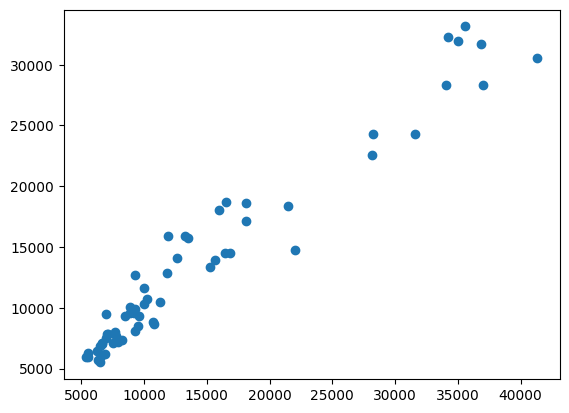

In [ ]:
plt.scatter(y_test, predict)
plt.show()

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dtr.score(X_train, y_train)

0.998899534570205

In [ ]:
dtr.score(X_test, y_test)

0.9028440166783707

In [ ]:
predictdtr = dtr.predict(X_test)

In [ ]:
r2_square1 = r2_score(y_test,predictdtr)
print(f" R-squared: {r2_square1}")

 R-squared: 0.9028440166783707


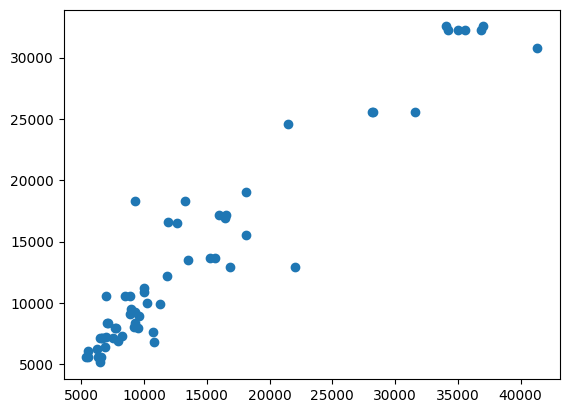

In [ ]:
plt.scatter(y_test, predictdtr)
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.8149841440835464

In [ ]:
lr.score(X_test, y_test)

0.7726835304749579

In [ ]:
predictlr = lr.predict(X_test)

In [ ]:
r2_square2 = r2_score(y_test,predictlr)
print(f" R-squared: {r2_square2}")

 R-squared: 0.7726835304749579


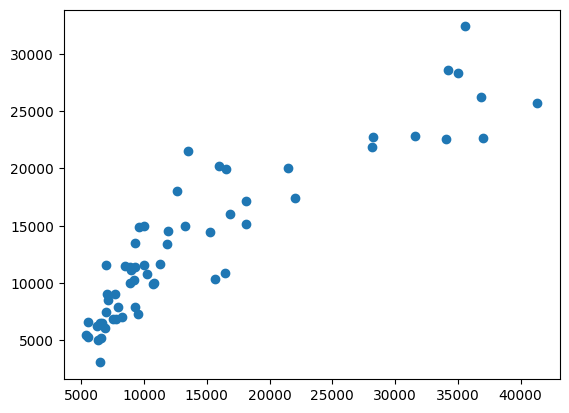

In [ ]:
plt.scatter(y_test, predictlr)
plt.show()